# Investment Inputs


global top_upAmount=int(input("Enter the monthly contribution: "))
global start_date=str(input("Enter the Starting date of investment period in DD/MM/YYYY format"))
global end_date=str(input("Enter the End Date of investment period in DD/MM/YYYY format"))

In [1]:
notebook_name='Cytonn'

In [2]:
# top_upAmount=500
# startDate= "01/08/2022"
# endDate= '01/11/2025'
# witholdingTax=0.15
# mmf_Yield=0.109
adminCharges=75

In [3]:
#top_upAmount=500

### Witholding Tax, Top-Up Amount, MMF Yields

global monthlyRate=mmf_Yield/12
global top_upAmount=int(input("Enter the monthly contribution: "))

# investmentDate_Duration---- Class Definition

In [4]:
class investmentDate_Duration:
    def __init__(self,startDate,endDate):

        self.investment_period=0
        self.adminCost=0
        

        #Split the end_date to determine the Day, Months and Years
        self.end_day=int(endDate.split('/')[0])
        self.end_month=int(endDate.split('/')[1])
        self.end_year=int(endDate.split('/')[2])
        # Split the Start_date to determine the Day, Months and Years
        self.start_day=int(startDate.split('/')[0])
        self.start_month=int(startDate.split('/')[1])
        self.start_year=int(startDate.split('/')[2])
        # Months of the Year
        self.calendar_months=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
        # Investment parameters
    def period(self):
        """ Returns the number of months the Investment lasts
        """
        if (self.end_month<self.start_month) and (self.end_year>self.start_year):
            # Case example 
            #Exceptional case scenario e.g., End date= '01/01/2025' and Start date is '01/04/2022'
            self.investment_period=(self.end_year-self.start_year)*12+(abs(self.start_month-self.end_month))
        else:
            #Normal case scenario
            self.investment_period=(self.end_year-self.start_year)*12+(abs(self.end_month-self.start_month))
            #print("Investment period (in months) is: {}".format(investment_period))
        return self.investment_period
    """Usage Format :investment_period(startDate,endDate)
    #Usage example:
                  investmentDate_Duration('01/05/2022','01/10/2023') """
    # Example s=investmentDate_Duration('01/05/2023','01/10/2022')'
    #         s.period()
    def calendar(self):
         # Check the calendar months and return the start month from its corresponding index 
        self.investment_Start_month=self.calendar_months[self.start_month-1] # List indices start from 0 so minus 1
        # Check the calendar months and return the end month from its corresponding index 
        self.investment_End_month=self.calendar_months[self.end_month-1] # List indices start from 0 so minus 1
        self.investmentYears=self.end_year-self.start_year
        #return [self.investment_Start_month,self.investment_End_month]
        return self.investmentYears
    def investing_Months(self):
        self.investment_Months=[]
        if (self.end_month<self.start_month) and (self.end_year>self.start_year):
            # #Exceptional case scenario e.g., End date= '01/01/2025' and Start date is '01/04/2022'
            self.investment_Months=self.calendar_months[self.start_month-1::]+self.calendar_months[:self.end_month]
            return self.investment_Months
        else:
            #Normal case scenario e.g., End date= '01/04/2025' and Start date is '01/01/2022'
            self.investment_Months=self.calendar_months[self.start_month-1:self.end_month]
            return self.investment_Months
    def adminCosts(self):
        period=self.period()
        if (self.start_year!=self.end_year) or (period>6 and period>12):
            'Adminstration cost applies when investment is more than 6 months and its past December'
            self.adminCost=(period//12)*adminCharges
        else:
            print("No admin charges apply")
            self.adminCost=0
        return self.adminCost

## InvestmentDuration -- Usage Example 

In [5]:
#sal=investmentDate_Duration('01/05/2022','01/10/2023')
#sal.calendar()
#print(s.monthly_v)

In [6]:
#sal.period()

In [7]:
#s.investing_Months()

### Determining the Adminstration Charges

In [8]:
#s.adminCosts()

# investmentDataFrame

In [9]:
class investmentDataFrame:
    """Investment Data Frame
    
    Keyword arguments:
    top_upAmount=500
    startDate= "01/08/2022"
    endDate= '01/11/2025'
    witholdingTax=0.15
    mmf_Yield=0.109
    adminCharges=75
    argument -- description


    Return: return_description
    """
    
    def __init__(self,top_upAmount,startDate,endDate,witholdingTax,mmf_Yield,adminCharges):
        self.top_upAmount=top_upAmount
        self.startDate=startDate
        self.endDate=endDate
        self.witholdingTax=witholdingTax
        self.mmf_Yield=mmf_Yield
        self.adminCharges=adminCharges
        print("Investment Data Analysis commencing")
        self.s=investmentDate_Duration(self.startDate,self.endDate)
        import pandas as pd
        self.investmentDF=pd.DataFrame()
        self.topupTotal=0
        self.topupcharge=0
        self.runningBal=0
        self.paybillCost=0
        self.net_Interest=0
        self.witholdtax=0
        self.witholdingTaxRate=self.witholdingTax
        self.mmf_YieldRate=self.mmf_Yield/12
        self.monthly_Inflow=self.top_upAmount
        self.totalcharges=0
        self.adminstrationCosts=0
        #s.calendar()
    def investmentRange(self):
        'Updates the Dates in the Data Frame'
        import datetime
        import pandas as pd
        start_date = datetime.date(self.s.start_year,self.s.start_month,self.s.start_day)
        # e.g Executes such that; start_date = datetime.date(2010,8,1)
        end_date = datetime.date(self.s.end_year,self.s.end_month,self.s.end_day)
        #end_date = datetime.date(2016,2,1)
        date_range = pd.date_range(start_date, end_date)
        self.firstDate_range = pd.date_range(start=start_date, end=end_date,freq='MS')
        self.fourthDate_range = pd.date_range(start=start_date, end=end_date,freq='MS').shift(3,freq='D')
        self.investmentDates=[item for sublist in zip(self.firstDate_range,self.fourthDate_range) for item in sublist]
        del self.investmentDates[-1]
        self.investmentDF['Date']=self.investmentDates
        self.investmentDFLen=len(self.investmentDF)
        return [self.investmentDF,self.firstDate_range,self.fourthDate_range,self.investmentDates]
    def interest(self,runningBalance):
        #self.runningBal=runningBalance
        'This function updates the interest and Tax Witheld in the running balance'
        ran=self.investmentRange()
        gross_Interest=round((self.mmf_YieldRate)*runningBalance,64)
        tax_witheld=self.witholdingTaxRate*gross_Interest
        self.witholdtax=tax_witheld
        net_Interest=gross_Interest-(tax_witheld)
        self.net_Interest=gross_Interest-(tax_witheld)
        return [None,self.net_Interest,gross_Interest,self.witholdtax]
        # Returns the List where Index 1 - Net Interest
        #........................Index 2 - Gross_Interest
        #........................Index 3 - Tax_witheld
    def runningBalance(self):
        'This function updates the running balance in the Data Frame'
        dates=self.investmentRange()
        #newBalance=self.monthly_Inflow+self.interest()[1]
        #self.investmentDF['Running Balance']=self.runningBal
        investmentRange=self.investmentRange()
        for rIndex in range(0,self.investmentDFLen): # Iterate between the rows
            if rIndex==0: # The first running balance is 0 by default
                self.investmentDF.at[rIndex,'Running Balance']=self.runningBal
                rIndex+=1
            elif rIndex==1:
                # Second Running Balance is equal to monthly top-up Amount also by Default
                self.runningBal+=self.monthly_Inflow
                self.investmentDF.at[rIndex,'Running Balance']=self.runningBal
                rIndex+=1
                #first_Date_value=investmentRange[1][0]
            else: # This is where the Investment now grows with Interest and Taxes (:^-^:)
                # We shal revisit
                if (self.investmentDF.at[rIndex,'Date'] in dates[1])==True:
                # If the date is among the 01-Mon-Year Dates
                    'Running Balance for the First Date is Net Interest + Last month running balance'
                    from decimal import Decimal
                    interest=round(self.interest(self.runningBal)[1],64)
                    self.runningBal+=interest

                    'Update the Running Balance in the DataFrame'
                    self.investmentDF.at[rIndex,'Running Balance']=self.runningBal
                    #previousBalance=int(self.investmentDF.at[rIndex-1,'Running Balance'])
                    rIndex+=1
                else:
                    'Running Balance for the 4TH Date is Net Interest + Last month running balance'
                    self.runningBal+=self.monthly_Inflow
                    #print(self.runningBal)
                    self.investmentDF.at[rIndex,'Running Balance']=self.runningBal
                    rIndex+=1
        #return self.investmentDF
    def paybillCharges(self):
        'This Function only assumes that the person is  customer'
        topup=self.monthly_Inflow
        dates=self.investmentRange()
        import pandas as pd
        paybillCSV=pd.read_csv('Paybill Charges.csv')
        # Support for Business coming soon
        def tariff_Topup(type_Tariff):
            for row in range(0,len(paybillCSV)):
                min=int(paybillCSV.at[row,'MIN'])
                max=int(paybillCSV.at[row,'MAX'])
                #topup=int(topup)
                if topup>=min and topup<=max:
                    if type_Tariff=='MGAO' or type_Tariff=='mgao' or type_Tariff=='Mgao':
                        #print("The row is:{}".format(row))
                        self.topupcharge=paybillCSV.iat[row,2]
                        return self.topupcharge
                    elif type_Tariff=='Business' or type_Tariff=='BUSINESS' or type_Tariff=='business':
                        self.topupcharge=paybillCSV.iat[row,5]
                        return self.topupcharge
                    elif type_Tariff=='Customer' or type_Tariff=='CUSTOMER' or type_Tariff=='customer':
                        self.topupcharge=paybillCSV.iat[row,8]
                        return self.topupcharge
                    else:
                        pass
                else:
                    pass
                    #print("Computing Paybill charges")
        print("Unless specified the Default tariff is the 'Business' one ")
        self.tariffType='Business'
        'Uncomment to prompt user to enter Tariff Type'
        #self.tariffType=input("Enter the tariff type: MGAO / BUSINESS / CUSTOMER")
        topUpcharges=tariff_Topup(self.tariffType)
        print("Your tariff type is.{}".format(self.tariffType))
        print("In your tarriff, a monthly Top-up of {} yields a transaction fee of: {}".format(self.monthly_Inflow,topUpcharges))
        dates=self.investmentRange()
        for no_row in range(0,self.investmentDFLen): # Iterate between the rows
            if (self.investmentDF.at[no_row,'Date'] in dates[2])==True:
                'When the date is among the 4th day of the month'
                self.topupTotal+=self.monthly_Inflow
                self.investmentDF.at[no_row,'Top-up Totals']=int(self.topupTotal)
                self.investmentDF.at[no_row,'Top-Up charges']=int(topUpcharges)
                no_row+=1
            else:
                'When the date is among other dates of the month'
                self.investmentDF.at[no_row,'Top-up Totals']=0.0
                self.investmentDF.at[no_row,'Top-Up charges']=0.0
                #pass
        self.paybillCost=self.investmentDF['Top-Up charges'].sum()
        #print("Total cost incurred for Paybill Transactions: {}".format(self.paybillCost))
        return [self.paybillCost,self.topupTotal]
    def totalCharges(self):
        self.paybillCharges()
        #paybillcharge=self.paybillCost
        self.paybillCost=self.investmentDF['Top-Up charges'].sum()
        #self.runningBalance() # Call the running balance function to update the witheld Taxes from self.interest()
        #taxes_amount=self.witholdtax
        #self.runningBalance()
        taxes_amount=self.interest(self.runningBal)[3]
        #taxes_amount=self.witholdtax
        investment_calendar=investmentDate_Duration(self.startDate,self.endDate)
        investment_period=investment_calendar.period()
        self.adminstrationCosts=investment_calendar.adminCosts()
        print("Your investment period of: {} months translates to {} ksh of adminstration charges".format(investment_period,self.adminstrationCosts))
        self.totalcharges=taxes_amount+self.paybillCost+self.adminstrationCosts
        print("The total charges are:{}".format(self.totalcharges))
        return [self.paybillCost,self.totalcharges,taxes_amount]
    def run(self):
        import pandas as pd
        self.__init__(self.top_upAmount,self.startDate,self.endDate,self.witholdingTax,self.mmf_Yield,self.adminCharges)
        self.totalCharges()
        self.runningBalance()
        #self.paybillCharges()
        #self.inputCostDF=pd.DataFrame({'Total Top-Up':[self.topupTotal],'Running Balance':[self.runningBal],'Interest':[self.interest(self.runningBal)[2]],'Total Charges':[self.totalcharges],'Paybill Costs':self.paybillCost})
        self.inputCostDF=pd.DataFrame({'Total Top-Up':[self.topupTotal],'Running Balance':[self.runningBal],'Interest':[self.runningBal-self.topupTotal],'Total Charges':[self.totalcharges],'Paybill Costs':self.paybillCost})
        return [self.inputCostDF,self.investmentDF]

    # The end

## investmentDataFrame Usage

In [10]:
"""Syntax: (self,top_upAmount,startDate,endDate,witholdingTax,mmf_Yield,adminCharges)'
For example with:
    top_upAmount=500
    startDate= "01/08/2022"
    endDate= '01/11/2025'
    witholdingTax=0.15
    mmf_Yield=0.109
    adminCharges=75

    e.g., df=investmentDataFrame("01/08/2022",'01/01/2023',0.15,0.109,75)
"""
df=investmentDataFrame(700,"04/09/2022",'01/11/2027',0.15,0.109,75)

Investment Data Analysis commencing


In [11]:
type(df.runningBal)

int

### DataFrame

In [12]:
investmentF=df.run()
costTopDF=investmentF[0]

Investment Data Analysis commencing
Unless specified the Default tariff is the 'Business' one 
Your tariff type is.Business
In your tarriff, a monthly Top-up of 700 yields a transaction fee of: 23
Your investment period of: 62 months translates to 375 ksh of adminstration charges
The total charges are:1778.0


In [13]:
costTopDF

,Total Top-Up,Running Balance,Interest,Total Charges,Paybill Costs
0,42700,54695.292886,11995.292886,1778.0,1403.0


In [14]:
df1=investmentF[1]
df1

,Date,Top-up Totals,Top-Up charges,Running Balance
0,2022-10-01,0.0,0.0,0.000000
1,2022-10-04,700.0,23.0,700.000000
2,2022-11-01,0.0,0.0,705.404583
3,2022-11-04,1400.0,23.0,1405.404583
4,2022-12-01,0.0,0.0,1416.255478
...,...,...,...,...
118,2027-09-01,0.0,0.0,52465.751216
119,2027-09-04,42000.0,23.0,53165.751216
120,2027-10-01,0.0,0.0,53576.235120
121,2027-10-04,42700.0,23.0,54276.235120


<AxesSubplot:>

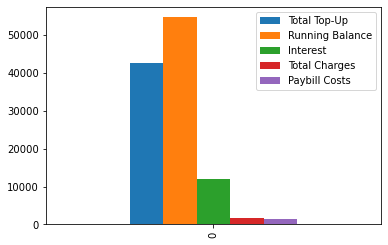

In [15]:
costTopDF.plot.bar()

### DataFrame to csv 

In [16]:
import pandas as pd
from datetime import date
today=str(date.today())
csv_file=df.investmentDF.to_csv('first_data_Analysis '+today+'.csv',index=False)